In [1]:
import numpy as np
digits = [
    [
        [1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]
    ],
    [
        [-1, -1, 1, -1, -1],
        [-1, 1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, 1, 1, 1, -1]
    ],
    [
        [1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1],
        [1, -1, -1, -1, -1],
        [1, -1, -1, -1, -1],
        [1, 1, 1, 1, 1]
    ]
]

In [2]:
import numpy as np
import random
class HebbLearningModel:
    def __init__(self, input_size, learning_rate=0.1):
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.weights = np.zeros((input_size,input_size))
    def train(self, vectors):
        for vector in vectors:
            for i in range(len(vector)):
                for j in range(len(vector)):
                    self.weights[i,j]+=self.learning_rate*vector[i]*vector[j]  
    def predict(self,x):
        return np.dot(self.weights,x)
    def predict_sign(self,x):
        p=self.predict(x)
        return np.where(p>0,1,-1)

In [3]:
hebb=HebbLearningModel(30,0.1)
digits=[np.array(i).flatten() for i in digits]
for i in range(10):
    hebb.train(digits)

### 设置添加噪声的函数  

In [4]:
def add_noise(vector, noise_level=0.1):
    noisy_vector = vector.copy()
    for i in range(len(noisy_vector)):
        if random.random() < noise_level:
            noisy_vector[i] *= -1
    return noisy_vector

### 展示添加噪声的图像

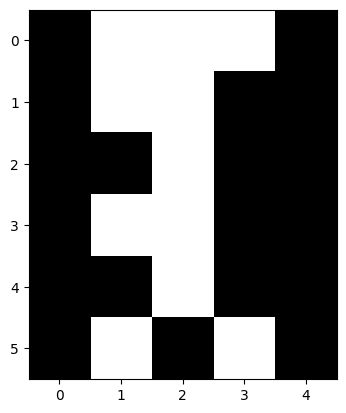

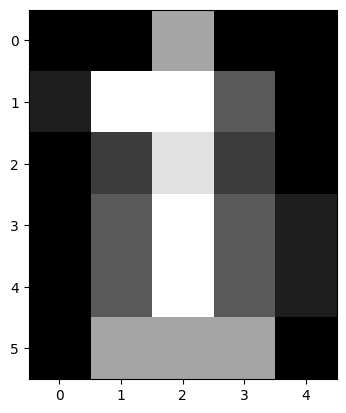

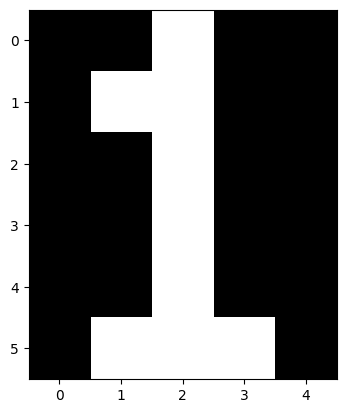

In [9]:
import matplotlib.pyplot as plt 
noised=add_noise(digits[1].flatten())
plt.imshow(noised.reshape(6,5),cmap='gray')
plt.show()
pred=hebb.predict(noised).reshape(6,5)
plt.imshow(pred,cmap='gray')
plt.show()
pred_sign=hebb.predict_sign(noised).reshape(6,5)
plt.imshow(pred_sign,cmap='gray')
plt.show()